# Máquina de Boltzmann Restritas

Nas palavras de Bengio e Goodfellow, "Máquinas de Boltzmann Restritas são o exemplo quintessencial de como modelos de grafos são utilizados em *Deep Learning*". Elas tiveram um papel importantíssimo no ressurgimento das redes neurais em 2006, permitindo o treinamento eficiente de modelos profundos. Dentre as aplicações mais notáveis de MBR, estão redução de dimensionalidade, pré-treinamento de redes neurais, detecção de fraudes e sistemas de recomendação colaborativos. Elas inclusive foram usadas pelos campeões do [Prêmio Netflix](https://en.wikipedia.org/wiki/Netflix_Prize#Cancelled_sequel), numa competição em que a empresa pagaria 1 milhão de dólares para quem conseguisse melhorar o seus sistema de recomendação em 10%.

## Intuição

Máquinas de Boltzmann são modelos probabilísticos (ou geradores) não supervisionados, baseados em energia. Isso significa que elas associam uma energia para cada configuração das variáveis que se quer modelar. Intuitivamente, aprender nesses modelos corresponde a associar configurações mais prováveis à estados de menor energia. Nesses estados existem unidades que chamamos visíveis, denotadas por \\(v\\), e unidades ocultas, denotadas por \\(h\\). Para tornar isso mais correto, pense na Máquina de Boltzmann abaixo como representando os possíveis estados de uma festa. Cada ponto branco corresponde a uma pessoa que conhecemos e cada ponto azul, a uma que não conhecemos. Esses pontos assumem valor 1 se a pessoa for festa e 0 caso ela faltar. A probabilidade de uma pessoa ir à festa depende da probabilidade de todas as outras pessoas irem na festa. 

[img: boltzmann_machines]

Podemos pensar nas conexões como a relação entre as pessoas. Assim, a probabilidade de uma pessoa ir à festa depende dessas conexões, mas apenas se contabiliza as conexões das pessoas presentes (i.e. com 1 no ponto). Por exemplo, digamos que a conexão entre \\(v_1\\) e \\(v_4\\) seja negativa, indicando que essas pessoas não se gostam. Assim, se uma delas for a festa, a probabilidade da outra ir diminui. Note que algumas conexões podem ter valor próximo de zero, indicando que as pessoas são indiferentes entre si. Nesse caso, a presença de uma na festa não influencia diretamente na probabilidade de presença da outra, mas ainda pode haver influência indireta, por meio de outras pessoas. Por fim, há um estado da festa em que a maioria das pessoas presentes não se gostam. Esse estado é de bastante tensão ou **energia** e há uma tendência para que ele não ocorra frequentemente. As Máquinas de Boltzmann capturam isso ao colocar pouca probabilidade em estados com muita energia.  

Com esse exemplo você já deve ter percebido que Máquinas de Boltzmann são extremamente complicadas. Afinal, para saber a probabilidade de que uma unidade esteja ligada (seja 1), é preciso saber o estado de todas as outras, pois podem haver relações indiretas. De fato, Máquinas de Boltzmann são tão complicadas que ainda não mostraram utilidade prática. Por isso teremos que restringi-las de alguma forma. As Máquinas de Boltzmann Restritas cumprem esse papel. Elas são Máquinas de Boltzmann com a condição de que não há conexões diretas entre as unidades visíveis nem entre as ocultas. Isso as torna mais simples e práticas, mas também menos intuitiva; nosso exemplo da festa deixa de fazer muito sentido quando apenas pessoas conhecidas só interagem diretamente com pessoas desconhecidas. Em vez disso, infelizmente, terei que fornecer uma explicação intuitiva mais abstrata.

Apesar da restrição, Máquinas de Boltzmann Restritas, em teoria, conseguem representar qualquer fenômenos que quisermos, contanto que ela tenha unidades ocultas \\(h\\) suficiente. As unidades visíveis nesse caso são as variáveis cuja interação entre si queremos entender. Com as MBR, forçamos a relação entre as unidades visíveis a acontecer indiretamente, por meio da unidades ocultas. Assim, quanto mais unidades ocultas, maior a capacidade da MBR de capturar interações complexas entre as variáveis.

## Formulação Matemática

Em termos estatísticos, MBR definem uma distribuição de probabilidade:

$$p(\pmb{v})=\frac{e^{-E(\pmb{v},\pmb{h})}}{Z}$$

em que \\(Z\\) é o fator normalizador, também chamado de **função de partição**, \\(\sum_{v,hv} e^{-E(\pmb{v,h})}\\).  O custo então é simplesmente o negativo da \\(\log\\) probabilidade

$$\mathcal{L}(\pmb{\theta}) = -\frac{1}{N} \sum_{i=0}^N \log p(\pmb{v}_i) $$

Treinar esses modelos equivale a utilizar gradiente descendente estocástico na \\(\log\\) probabilidade empírica e maximizar a \\(\log\\)-verossimilhança. Para as Máquinas de Boltzmann Restritas, a energia é dada por

$$E(\pmb{h}, \pmb{x}) = -\pmb{b} \cdot\pmb{v} -\pmb{c} \cdot\pmb{h} - \pmb{h}^T \pmb{W} \pmb{v}$$

em que \\(\pmb{b}\\) e \\(\pmb{c}\\) são termos de viés das camadas visíveis e ocultas, respectivamente. Note como a energia é linear nos parâmetros, o que nós dá derivadas simples e eficientes de computar. A restrição nas MBR diz respeito ao fato de não haver conexões entre as unidades ocultas nem entre as unidades visíveis. Como consequência, o estado das unidades ocultas é **condicionalmente independente**, dado o estado visível e o estado visível é condicionalmente independente, dado o estado oculto. Em termos mais intuitivos, se tivermos o estado oculto, podemos retirar amostrar do estado visível de maneira eficiente, já que não temos que nos preocupar como diferentes variáveis desse estado interagem entre si, e vice versa.  

$$P(\pmb{v}|\pmb{h})=\prod p(h_i|\pmb{v})$$
$$P(\pmb{h}|\pmb{v})=\prod p(v_i|\pmb{h})$$

Aqui, veremos Máquinas de Boltzmann Restritas binárias. Isso significa que cada unidade estará ligada ou desligada e a probabilidade disso é dada pela ativação sigmoide de cada unidade, ou neurônio:

$$P(h_i=1|\pmb{v})=\sigma(c_i + \pmb{w_i}\pmb{v})$$
$$P(v_i=1|\pmb{h})=\sigma(b_i + \pmb{w_i}^T\pmb{h})$$

Com essa especificação binária, o gradiente da \\(\log\\) probabilidade assume uma forma particularmente interessante. Não é o propósito deste tutorial derivar esses gradiente, até porque vamos computar derivadas automaticamente, com autodiferenciação. Assim, vou apenas colocar o resultado final:

$$ \frac{\partial \pmb{\theta}}{\partial} \log p(\pmb{v}_n) = \mathbb{E}\Big[\frac{\partial}{\partial \theta} -E(\pmb{v}, \pmb{h}) \Big|\pmb{v} = \pmb{v}_n \Big] - \mathbb{E}\Big[\frac{\partial}{\partial \theta}- E(\pmb{v}, \pmb{h})\Big]$$

O primeiro termo dessa derivada é chamado de **fase positiva**, pois seu papel é aumentar a probabilidade dos dados. Você pode pensar nele como a média da derivada da energia quando amostras dos dados estão acoplada no lugar das unidades visíveis. O segundo termo é o que chamamos de **fase negativa**, pois seu papel é reduzir a probabilidade de amostrar geradas pelo modelo. Você pode pensar nele como a média da derivada da energia quando não há amostras acopladas no lugar das unidades visíveis. Para aqueles interessados, ao desenvolvimento derivadas podem ser conferidas [nestas notas de aula](http://www.cs.toronto.edu/~tijmen/csc321/documents/maddison_rbmtutorial.pdf) do curso *Introduction to Neural Networks and Machine Learning* (CSC321, 2014), da Universidade de Toronto. 

Devido à independência condicional, o primeiro termo relativo à fase negativa pode ser computado diretamente, bastando para isso colocar amostras dos dados em \\(\pmb{v}\\) e computar a probabilidade de \\(\pmb{h}\\). O problema então é computar o temo negativo. Ele é simplesmente a esperança de todas as configurações possíveis dos dados \\(\pmb{X}\\) sob a distribuição do modelo! Como isso costuma ser maior do que o número estimado de átomos no universo, precisaremos de algum corta caminho para computar o termo negativo.

Vamos **aproximar essa esperança com MCMC** (Cadeia de Markov Monte Carlo), isto é, vamos inicializar \\(N\\) Cadeias de Markov independentes nos dados e retirar iterativamente amostras de \\(\pmb{h}\\) e de \\(\pmb{v}\\). Esse processo iterativo recebe o nome de **Amostragem de Gibbs** alternada.

[IMG]

Matematicamente (abaixo, superscrito denota iteração, não exponente),

$$\pmb{v}_n^0 = \pmb{x}_n$$
$$\pmb{h}_n^{k} \sim P(\pmb{h}|\pmb{v}=\pmb{h}_n^k)$$
$$\pmb{v}_n^{k} \sim P(\pmb{v}|\pmb{h}=\pmb{h}_n^{k-1})$$

Então substituimos a espeança pela média que a aproxima

$$\mathbb{E}\Big[\frac{\partial}{\partial \theta}- E(\pmb{v}, \pmb{h})\Big] \approx \frac{1}{N} \sum_{n=0}^N \frac{\partial}{\partial \theta}- E(\pmb{v}_n^\infty, \pmb{h}_n^\infty)$$

### *Constrastive Divergence*
Ainda precisamos resolver um problema, que é rodar a Cadeia de Markov infinitamente (ou por muito tempo) para conseguir a aproximação desejada. Uma observação bastante surpreendente é que, na prática, executar apenas uma amostragem de Gibbs alternada (i.e. uma iteração de MCMC) é suficiente para se conseguir uma aproximação boa o suficiente para o treino. Essa uma iteração é o que chamamos de *Constrastive Divergence 1* ou CD1. Conforme o treinamento ocorre e queremos atualizações dos parâmetros mais refinadas, podemos aumentar o número de iteração e treinar a MBR com CD3. A forma mais comum de treinamento é começar com CD1, depois passar para CD3, então CD5 e, por fim, CD10.

# Implementação

In [1]:
import tensorflow as tf # para Máquinas de Boltzmann Restritas
import numpy as np # para computação numérica
from matplotlib import pyplot as plt # para mostrar imagens
from tensorflow.examples.tutorials.mnist import input_data # dados MNIST

data = input_data.read_data_sets("tmp/", one_hot=False)
data = np.random.permutation(data.train.images) # só precisamos das imagens aqui

Extracting tmp/train-images-idx3-ubyte.gz
Extracting tmp/train-labels-idx1-ubyte.gz
Extracting tmp/t10k-images-idx3-ubyte.gz
Extracting tmp/t10k-labels-idx1-ubyte.gz


In [2]:
class RBM():
    
    def __init__(self, nv=28*28, nh=512, cd_steps=3):
        
        self.graph = tf.Graph() # define o grafo TensorFlow do modelo
        with self.graph.as_default(): # abre o grafo
            
            # define as variáveis do modelo
            self.W = tf.Variable(tf.truncated_normal((nv, nh)) * 0.01)
            self.bv = tf.Variable(tf.zeros((nv, 1))) 
            self.bh = tf.Variable(tf.zeros((nh, 1)))
            
            self.cd_steps = cd_steps # números de iterações de Constrastive Divergence
            # para salvar os parâmetros do modelo em formato numpy
            self.modelW = None 
    
    def bernoulli(self, p):
        '''Retira amostras Bernoulli segundo um vetor de probabilidades p.'''
        return tf.nn.relu(tf.sign(p - tf.random_uniform(p.shape)))
    
    def energy(self, v):
        '''Energia da MBR, dado um estado visível v.'''
        b_term = tf.matmul(v, self.bv)
        linear_tranform = tf.matmul(v, self.W) + tf.squeeze(self.bh)
        h_term = tf.reduce_sum(tf.log(tf.exp(linear_tranform) + 1), axis=1) 
        return tf.reduce_mean(-h_term -b_term)
        
    def sample_h(self, v):
        '''Retira uma amostra do estado oculto h, dado o estado visível v'''
        ph_given_v = tf.sigmoid(tf.matmul(v, self.W) + tf.squeeze(self.bh))
        return self.bernoulli(ph_given_v)
    
    def sample_v(self, h):
        '''Retira uma amostra do estado visível v, dado o estado oculto h'''
        pv_given_h =tf.sigmoid(tf.matmul(h, tf.transpose(self.W)) + tf.squeeze(self.bv))
        return self.bernoulli(pv_given_h)
    
    def gibbs_step(self, i, k, vk):
        '''Realiza uma amostragem de Gibbs alternada'''
        hk = self.sample_h(vk)
        vk = self.sample_v(hk)
        return i+1, k, vk
    
    def train(self, X, lr=0.01, batch_size=64, epochs=5):
        
        with self.graph.as_default(): # abre o grafo TF do modelo
            tf_v = tf.placeholder(tf.float32, [batch_size, self.bv.shape[0]])
            v = tf.round(tf_v) # inicializa v
            vk = tf.identity(v) # inicializa vk

            # realiza k passos de amostragem de Gibbs
            i = tf.constant(0) # contador do loop
            _, _, vk = tf.while_loop(cond = lambda i, k, *args: i <= k,
                                      body = self.gibbs_step,
                                      loop_vars = [i, tf.constant(self.cd_steps), vk],
                                      parallel_iterations=1,
                                      back_prop=False)

            vk = tf.stop_gradient(vk) # para não fazer backprop pela amostragem Gibbs
            loss = self.energy(v) - self.energy(vk) # função custo da MBR
            optimizer = tf.train.AdamOptimizer(lr).minimize(loss)
            init = tf.global_variables_initializer()
            
        with tf.Session(graph=self.graph) as sess:
            init.run() # inicializa as variáveis do modelo
            for epoch in range(epochs): # treina por N épocas
                losses = []
                for i in range(0, len(X)-batch_size, batch_size):
                    x_batch = X[i:i+batch_size] # faz o mini-lote
                    l, _ = sess.run([loss, optimizer], feed_dict={tf_v: x_batch})
                    losses.append(l)
                # mostra o custo na época
                print('Custo na época %d: ' % epoch, np.mean(losses), end='\r')
                
            # salva os parâmetros do modelo
            self.modelW = self.W.eval()

In [3]:
rbm = RBM(cd_steps=3)
rbm.train(X=data, lr=0.001, epochs=15)

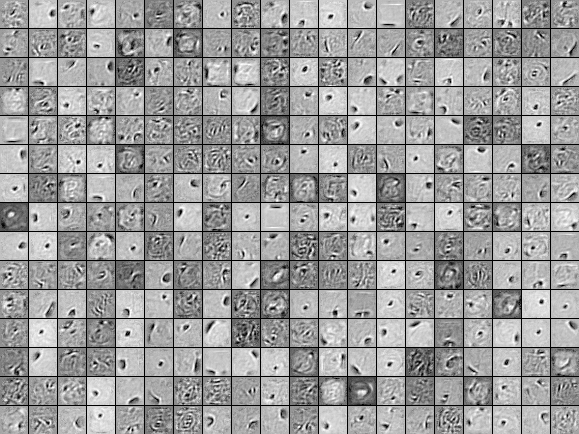

In [4]:
from dl_utils import tile_raster_images
import PIL

img = tile_raster_images(rbm.modelW.T,
                         img_shape=(28,28),
                         tile_shape=(15,20), tile_spacing=(1, 1))

im = PIL.Image.fromarray(img)
im